In [1]:
import numpy as np

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
import torch
import os
os.chdir('../../')
vocabulary = torch.load(
                os.path.join('models/dialogue_systems/training_data/full_dialogues_labeled/vocabulary.tar'))

In [7]:
from src.models.conversational.checkpoint import Checkpoint

latest_checkpoint_path = Checkpoint.get_latest_checkpoint('models/dialogue_systems')
checkpoint = Checkpoint.load(latest_checkpoint_path)
model = checkpoint.model
embeddings = model.encoder.embedding.weight.data
del model

In [9]:
embeddings.shape

torch.Size([40000, 30])

In [28]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], vocabulary.index2word[i],
                 fontdict={'weight': 'bold', 'size': 5})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

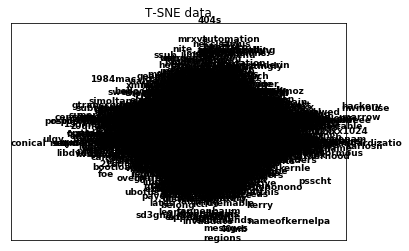

In [14]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(embeddings)

<IPython.core.display.Javascript object>


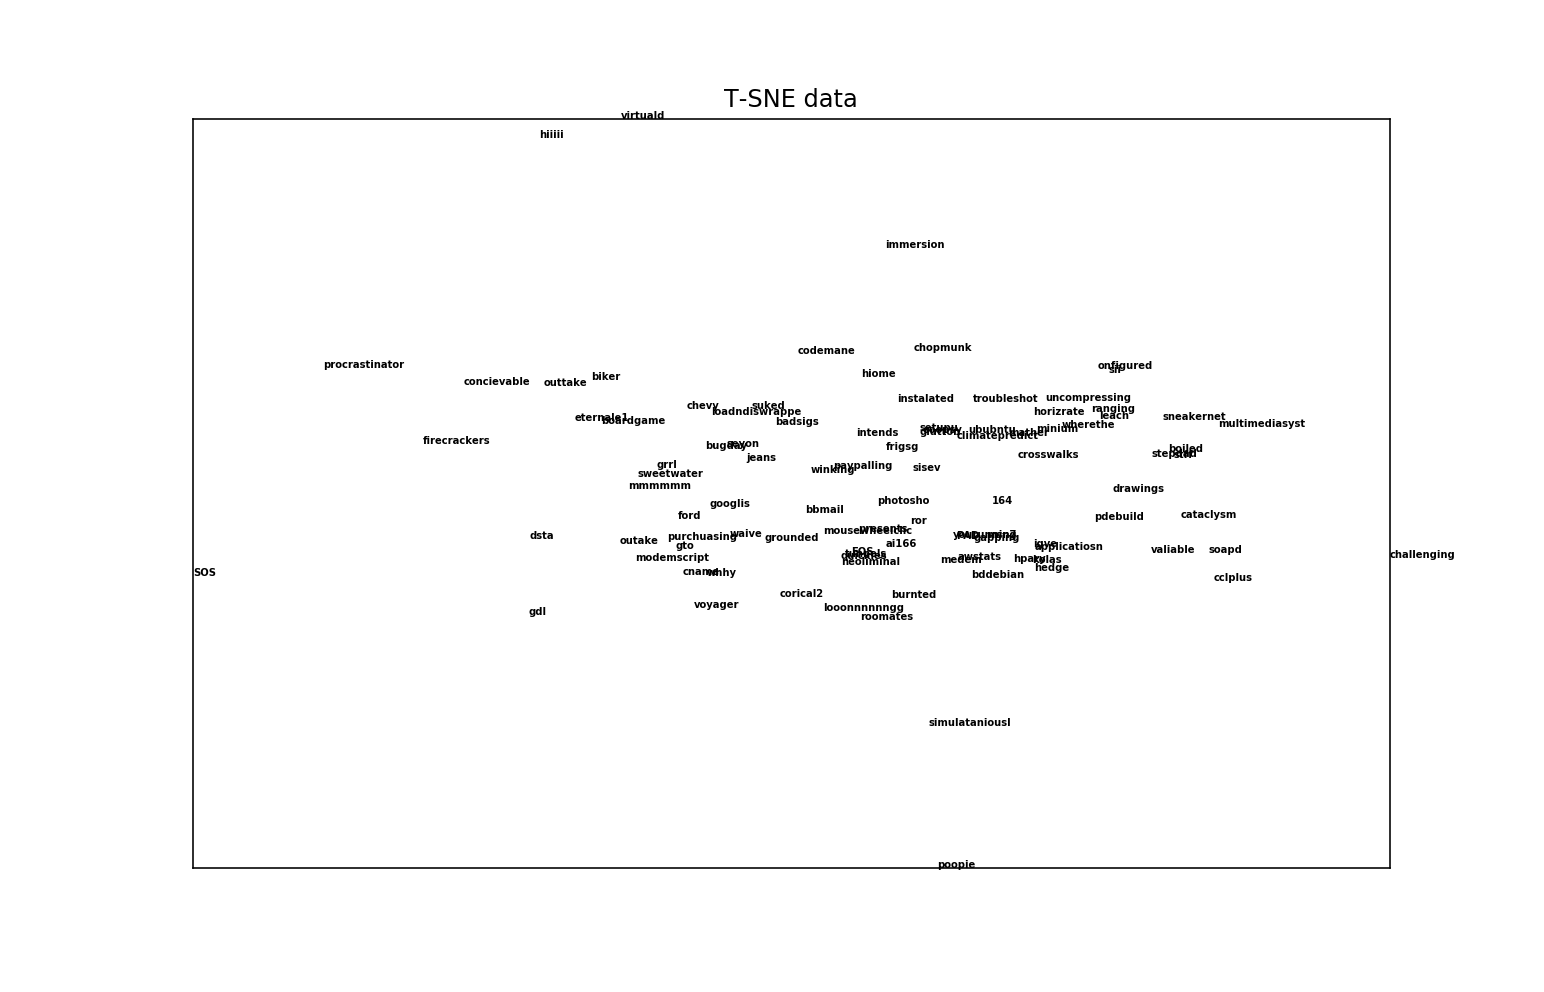

In [29]:
plot_embedding(X_tsne[-100:], "T-SNE data")